In [12]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import os
import time
from fastai.text import *

In [14]:
import sys
sys.path.append('./imdb_scripts/')


In [15]:
from create_toks import *
import sentencepiece as spm
from fastai.text import *
import math

In [16]:
sp64_lower = spm.SentencePieceProcessor()
sp64_lower.Load('data/imdb_lm_spm/model_64k_lowercase.model')

True

In [17]:
sp32_lower = spm.SentencePieceProcessor()
sp32_lower.Load('data/imdb_lm_spm/model_32k_lowercase.model')

True

In [18]:
sp16_lower = spm.SentencePieceProcessor()
sp16_lower.Load('data/imdb_lm_spm/model_16k_lowercase.model')

True

In [19]:
sp8_lower = spm.SentencePieceProcessor()
sp8_lower.Load('data/imdb_lm_spm/model_8k_lowercase.model')

True

In [20]:
import pandas as pd

# Vocabuary Statistics

In [58]:
def getVocabCount(vsize):
    vocab_f_str = 'data/imdb_lm_spm/model_'+ str(vsize) +'k_lowercase.vocab'
    vocabnum = []
    with open(vocab_f_str, 'r') as f: 
        vocabnum = f.readlines()
    print(f'Last 25 words included by {vsize}k vocab model:')
    print(vocabnum[-10:])
    print('-----------------------')
    return np.array([float(vn.split()[-1]) for vn in vocabnum])

In [59]:
v_counts = []
vocabs = [8, 16, 32, 64]
min_prob = 0
for i in vocabs: 
    v_count = getVocabCount(i)
    v_counts = v_counts + [v_count]
    min_prob = min(min_prob, np.min(v_count))
    

Last 25 words included by 8k vocab model:
['▁administration\t-12.1174\n', '▁applause\t-12.1174\n', '▁humiliate\t-12.1174\n', '▁lubitsch\t-12.1174\n', '▁pfeiffer\t-12.1174\n', '▁stephanie\t-12.1174\n', '▁swift\t-12.1174\n', 'worst\t-12.1229\n', '▁complicat\t-12.1246\n', '▁miyazaki\t-12.1282\n']
-----------------------
Last 25 words included by 16k vocab model:
['▁infuriate\t-13.1477\n', '▁kessler\t-13.1477\n', '▁uninterested\t-13.1477\n', '▁veidt\t-13.1477\n', '▁zelah\t-13.1477\n', '▁albino\t-13.1477\n', '▁goliath\t-13.1477\n', '▁squire\t-13.1477\n', '▁(1997)\t-13.1477\n', '▁edmond\t-13.1477\n']
-----------------------
Last 25 words included by 32k vocab model:
['▁antonietta\t-14.423\n', '▁appetizing\t-14.423\n', '▁aronofsky\t-14.423\n', '▁atlantean\t-14.423\n', '▁barjatya\t-14.423\n', '▁bierko\t-14.423\n', '▁borchardt\t-14.423\n', '▁bostwick\t-14.423\n', '▁brettschneider\t-14.423\n', '▁broinowski\t-14.423\n']
-----------------------
Last 25 words included by 64k vocab model:
['▁etahn\t

In [53]:
bins = np.linspace(min_prob, 0, 100)

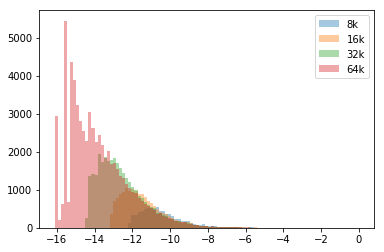

In [60]:
for c, size in zip(v_counts, vocabs):
    plt.hist(c, bins, alpha=0.4, label=str(size) + 'k')
plt.legend(loc='upper right')
plt.show()

# tokenizing power

In [67]:
milton_lower = "OF Mans First Disobedience, and the Fruit \n" + \
"Of that Forbidden Tree, whose mortal tast  \n" +  \
    "Brought Death into the World, and all our woe,  \n" +  \
    "With loss of Eden, till one greater Man  \n" +  \
    "Restore us, and regain the blissful Seat, \n" +  \
    "Sing Heav'nly Muse, that on the secret top  \n" +  \
    "Of Oreb, or of Sinai, didst inspire  \n" +  \
    "That Shepherd, who first taught the chosen Seed,  \n" +  \
    "In the Beginning how the Heav'ns and Earth  \n" +  \
    "Rose out of Chaos: or if Sion Hill  \n" +  \
    "Delight thee more, and Siloa's brook that flow'd  \n" +  \
    "Fast by the Oracle of God; I thence  \n" +  \
    "Invoke thy aid to my adventrous Song,  \n" +  \
    "That with no middle flight intends to soar  \n" +  \
    "Above th' Aonian Mount, while it pursues  \n" +  \
    "Things unattempted yet in Prose or Rhime. "

In [68]:
milton_lower = milton_lower.lower()

In [99]:
def printEncodedSentence(tokenizer, sentence):    
    print(''.join([' ' + s[1:] if (s[0]=='▁') else '-' + s for s in tokenizer.EncodeAsPieces(milton_lower)]))


In [101]:
vocabs = [8, 16, 32, 64]
sps = [sp8_lower, sp16_lower, sp32_lower, sp64_lower]

In [103]:
for v, sp in zip(vocabs, sps):
    print(f'tokenizer {v}k vocab')
    printEncodedSentence(sp, milton_lower)
    print('------------------------------------')

tokenizer 8k vocab
 of man-s first dis-ob-ed-i-ence-, and the fruit -
-of that for-bi-d-den tree-, who-se mortal ta-s-t -
-b-rough-t death into the world-, and all our wo-e-, -
-with loss of e-den-, till one greater man -
-re-store us-, and regain the bliss-ful seat-, -
-s-ing he-av-'-n-ly mu-se-, that on the secret top -
-of or-e-b-, or of sin-a-i-, did-s-t inspire -
-that shepherd-, who first taught the chosen see-d-, -
-in the beginning how the he-av-'-ns and earth -
-ro-se out of chaos-: or if -s-ion hill -
-de-light the-e more-, and si-lo-a-'-s -brook that flow-'-d -
-fa-s-t by the or-a-cle of god-; i the-nce -
-in-vo-ke th-y aid to my a-d-ven-t-rous song-, -
-that with no middle flight intend-s to so-ar -
-a-bo-ve th-' a-on-ian mount-, while it pursue-s -
-th-ing-s un-at-t-empt-ed yet in pro-se or r-hi-me-.
------------------------------------
tokenizer 16k vocab
 of man-s first dis-ob-ed-i-ence-, and the fruit -
-of that forbidden tree-, who-se mortal ta-s-t -
-b-rough-t death i